# NAME - DIVISION - ROLL.NO. - GR.NO.
#### SHUBHAM DESHPANDE - MECH D - 44 - 11810105
#### SUMEDH SHINGADE - MECH D - 39 - 11810306
#### PRASANNA RATHI - MECH D - 13 - 11811275
#### TAPAN SHINDE - MECH D - 37 - 11810035
#### KARNAL RAUT - IE A - 28 - 11810461

# IMPORTING LIBRARIES AND DATA SET

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
gend = pd.read_csv('Generation_Data.csv')
gend.head()

,Gen_Date,MW,Loc. No.,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,MND,GF,FM,S,U,NOR,Gen_Hrs,Opr_Hrs,FY
0,01-Apr-19,1.25,K410,6884,6884,6884,22.95,0.76,0.06,100,0.0,0.0,0.0,0.0,0.0,21.1,24.0,19-20
1,02-Apr-19,1.25,K410,4781,11665,11665,15.94,1.30,0.11,100,0.0,0.0,0.0,0.0,0.0,19.4,24.0,19-20
2,03-Apr-19,1.25,K410,4714,16379,16379,15.71,1.82,0.15,100,0.0,0.0,0.0,0.0,0.0,17.3,24.0,19-20
3,04-Apr-19,1.25,K410,4136,20515,20515,13.79,2.28,0.19,100,0.0,0.0,0.0,0.0,0.0,17.2,24.0,19-20
4,05-Apr-19,1.25,K410,8783,29298,29298,29.28,3.26,0.27,100,0.0,0.0,0.0,0.0,0.0,21.2,24.0,19-20


In [3]:
bred = pd.read_csv('Breakdown_Data.csv')
bred.head()

,Gen_Date,MW,Loc_No,Formula_Parameter,Breakdown_Remark,FY,Breakdown_Hrs.
0,14-Apr-19,1.25,K410,GF,Elec VoltageAsymmetry,19-20,0.4
1,14-Apr-19,1.25,K410,GF,INTL_Shut Down Taken By OMS,19-20,1.8
2,15-Apr-19,1.25,K410,FM,Natural Calamities,19-20,1.1
3,16-Apr-19,1.25,K410,U,Mech Generator PeakSpeedStop,19-20,1.4
4,23-Apr-19,1.25,K410,U,Pitch ResolverEncoderDiff2Stop,19-20,0.1


# DATA VISUALISATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264FC55FB00>,
      dtype=object)

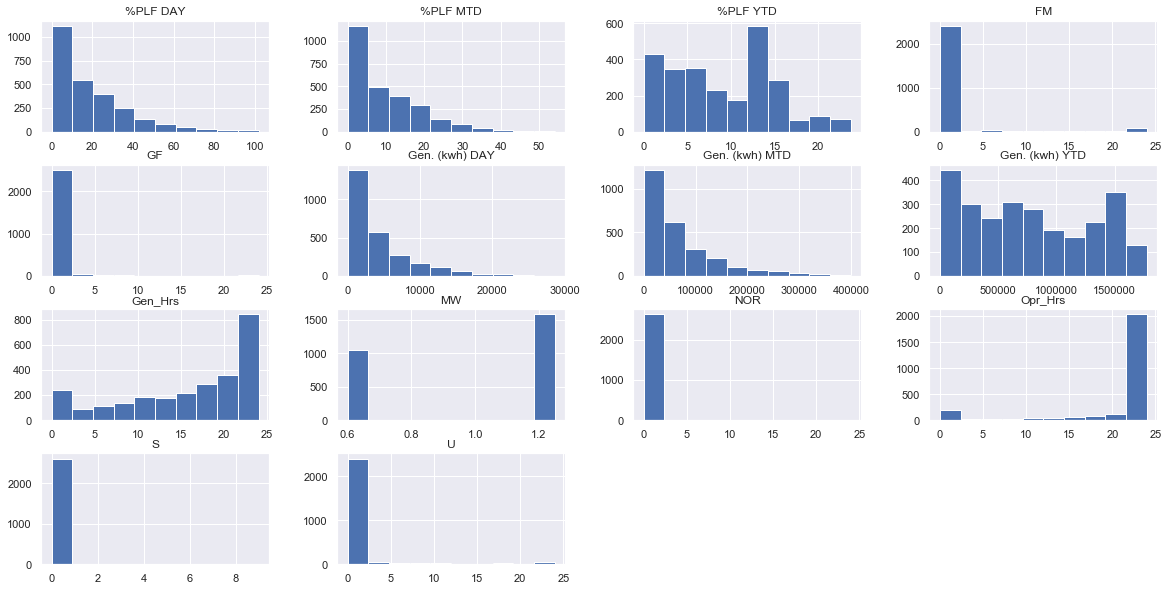

In [4]:
gend.hist(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264FE1ED588>,
      dtype=object)

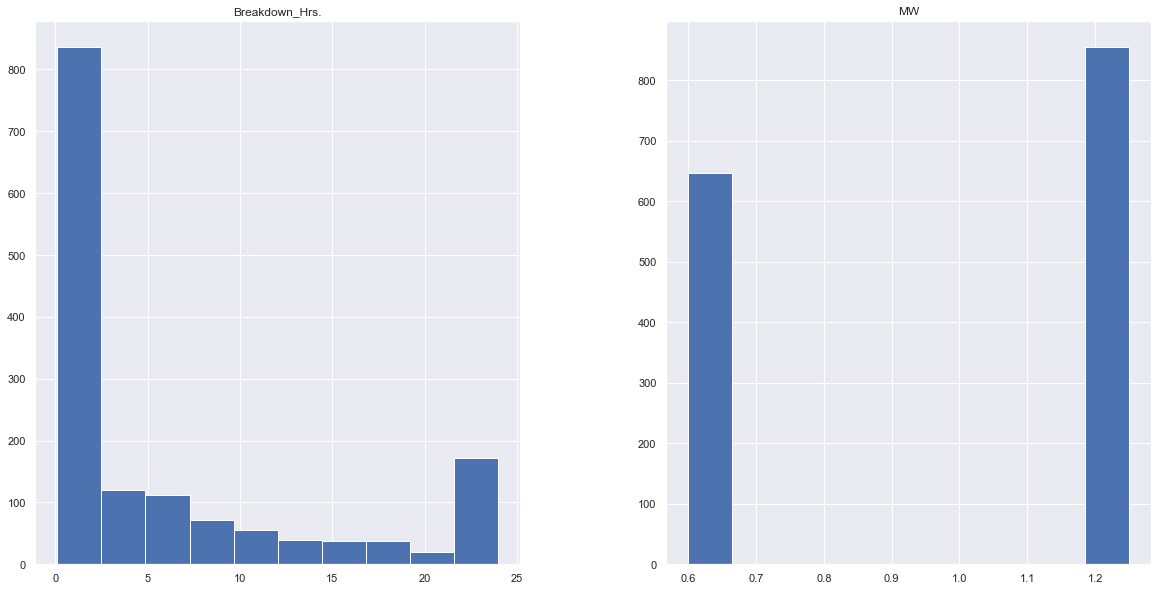

In [5]:
bred.hist(figsize=(20,10))

In [6]:
#bred = bred.drop(['MW', 'Loc. No.'], axis = 1)

In [7]:
bred.dtypes

Gen_Date              object
MW                   float64
Loc_No                object
Formula_Parameter     object
Breakdown_Remark      object
FY                    object
Breakdown_Hrs.       float64
dtype: object

In [8]:
bred.isnull().sum()

Gen_Date             0
MW                   0
Loc_No               0
Formula_Parameter    0
Breakdown_Remark     0
FY                   0
Breakdown_Hrs.       0
dtype: int64

In [9]:
gend = gend.drop(['MW', 'Loc. No.'], axis = 1)

In [10]:
gend.dtypes

Gen_Date           object
Gen. (kwh) DAY      int64
Gen. (kwh) MTD      int64
Gen. (kwh) YTD      int64
%PLF DAY          float64
%PLF MTD          float64
%PLF YTD          float64
MND                object
GF                float64
FM                float64
S                 float64
U                 float64
NOR               float64
Gen_Hrs           float64
Opr_Hrs           float64
FY                 object
dtype: object

In [11]:
gend.isnull().sum()

Gen_Date          0
Gen. (kwh) DAY    0
Gen. (kwh) MTD    0
Gen. (kwh) YTD    0
%PLF DAY          0
%PLF MTD          0
%PLF YTD          0
MND               0
GF                0
FM                0
S                 0
U                 0
NOR               0
Gen_Hrs           0
Opr_Hrs           0
FY                0
dtype: int64

### Breakdown_Remark Frequency

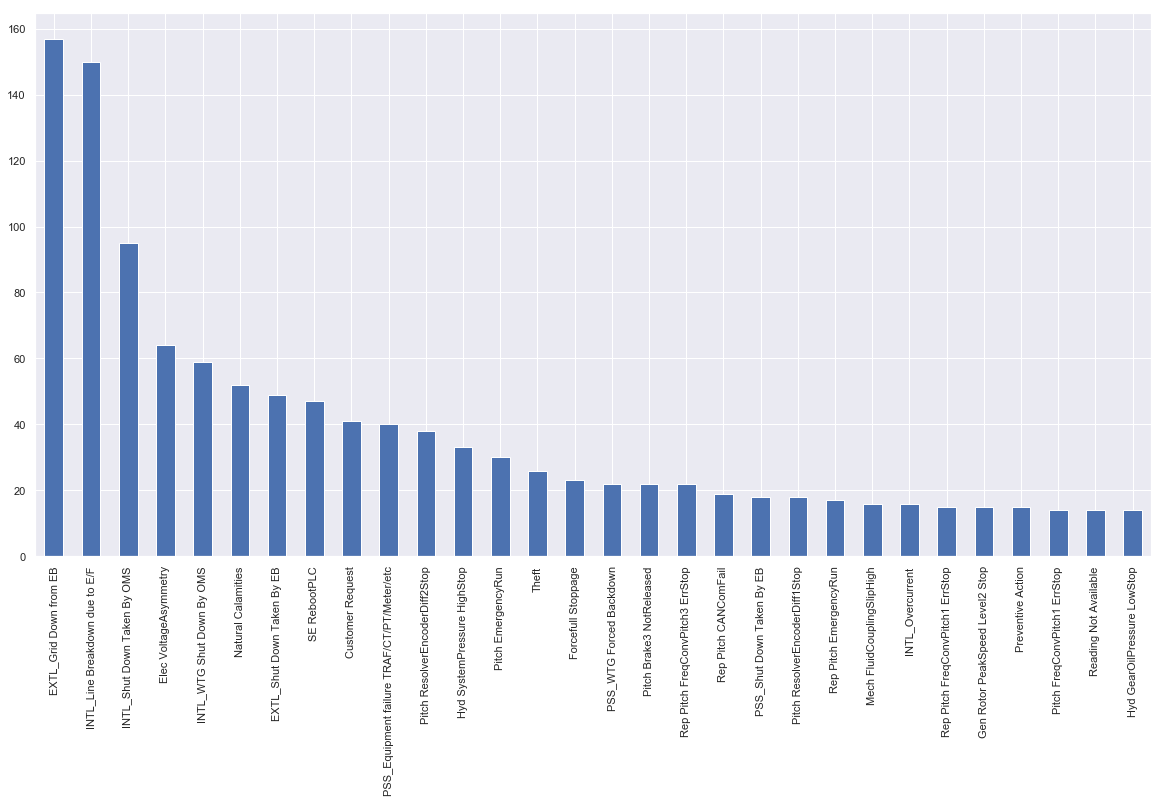

In [12]:
bred.Breakdown_Remark.value_counts().nlargest(30).plot(kind='bar', figsize=(20,10))

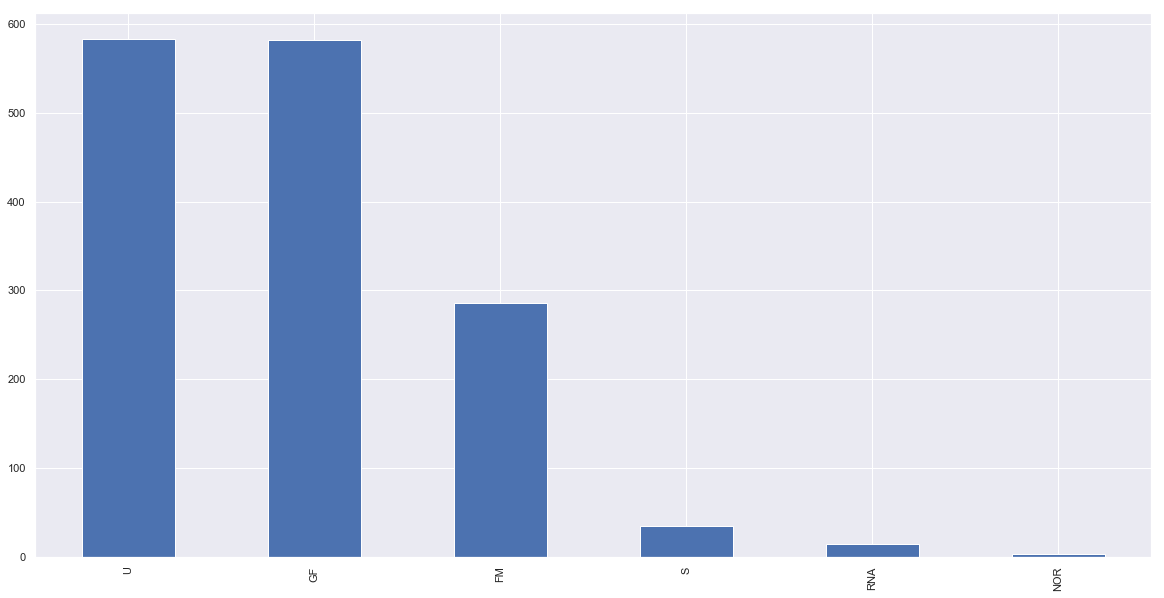

In [13]:
bred.Formula_Parameter.value_counts().nlargest(50).plot(kind='bar', figsize=(20,10))

,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,GF,FM,S,U,NOR,Gen_Hrs,Opr_Hrs
Gen. (kwh) DAY,1.000000,0.510768,-0.215910,0.893186,0.418442,-0.257341,-0.083641,-0.190945,-0.044501,-0.150101,-0.014029,0.595181,0.281727
Gen. (kwh) MTD,0.510768,1.000000,-0.130287,0.402585,0.890011,-0.189735,-0.055006,-0.038065,-0.037943,0.092741,-0.025719,0.223980,0.005102
Gen. (kwh) YTD,-0.215910,-0.130287,1.000000,-0.301043,-0.232604,0.815367,0.064061,-0.060373,0.050133,0.136876,-0.017379,-0.269911,-0.051909
%PLF DAY,0.893186,0.402585,-0.301043,1.000000,0.470479,-0.185339,-0.069126,-0.215691,-0.045871,-0.178415,-0.006996,0.661651,0.313002
%PLF MTD,0.418442,0.890011,-0.232604,0.470479,1.000000,-0.115630,-0.047087,-0.037732,-0.033187,0.028732,-0.026423,0.288285,0.041831
%PLF YTD,-0.257341,-0.189735,0.815367,-0.185339,-0.115630,1.000000,0.041307,-0.086367,0.071065,0.052753,-0.000976,-0.130928,0.021299
GF,-0.083641,-0.055006,0.064061,-0.069126,-0.047087,0.041307,1.000000,-0.025055,-0.016891,-0.006493,-0.005708,-0.222737,-0.325994
FM,-0.190945,-0.038065,-0.060373,-0.215691,-0.037732,-0.086367,-0.025055,1.000000,-0.022836,-0.073829,-0.008159,-0.463451,-0.653294
S,-0.044501,-0.037943,0.050133,-0.045871,-0.033187,0.071065,-0.016891,-0.022836,1.000000,-0.015410,-0.002453,-0.053717,-0.040696
U,-0.150101,0.092741,0.136876,-0.178415,0.028732,0.052753,-0.006493,-0.073829,-0.015410,1.000000,-0.007794,-0.408089,-0.564855


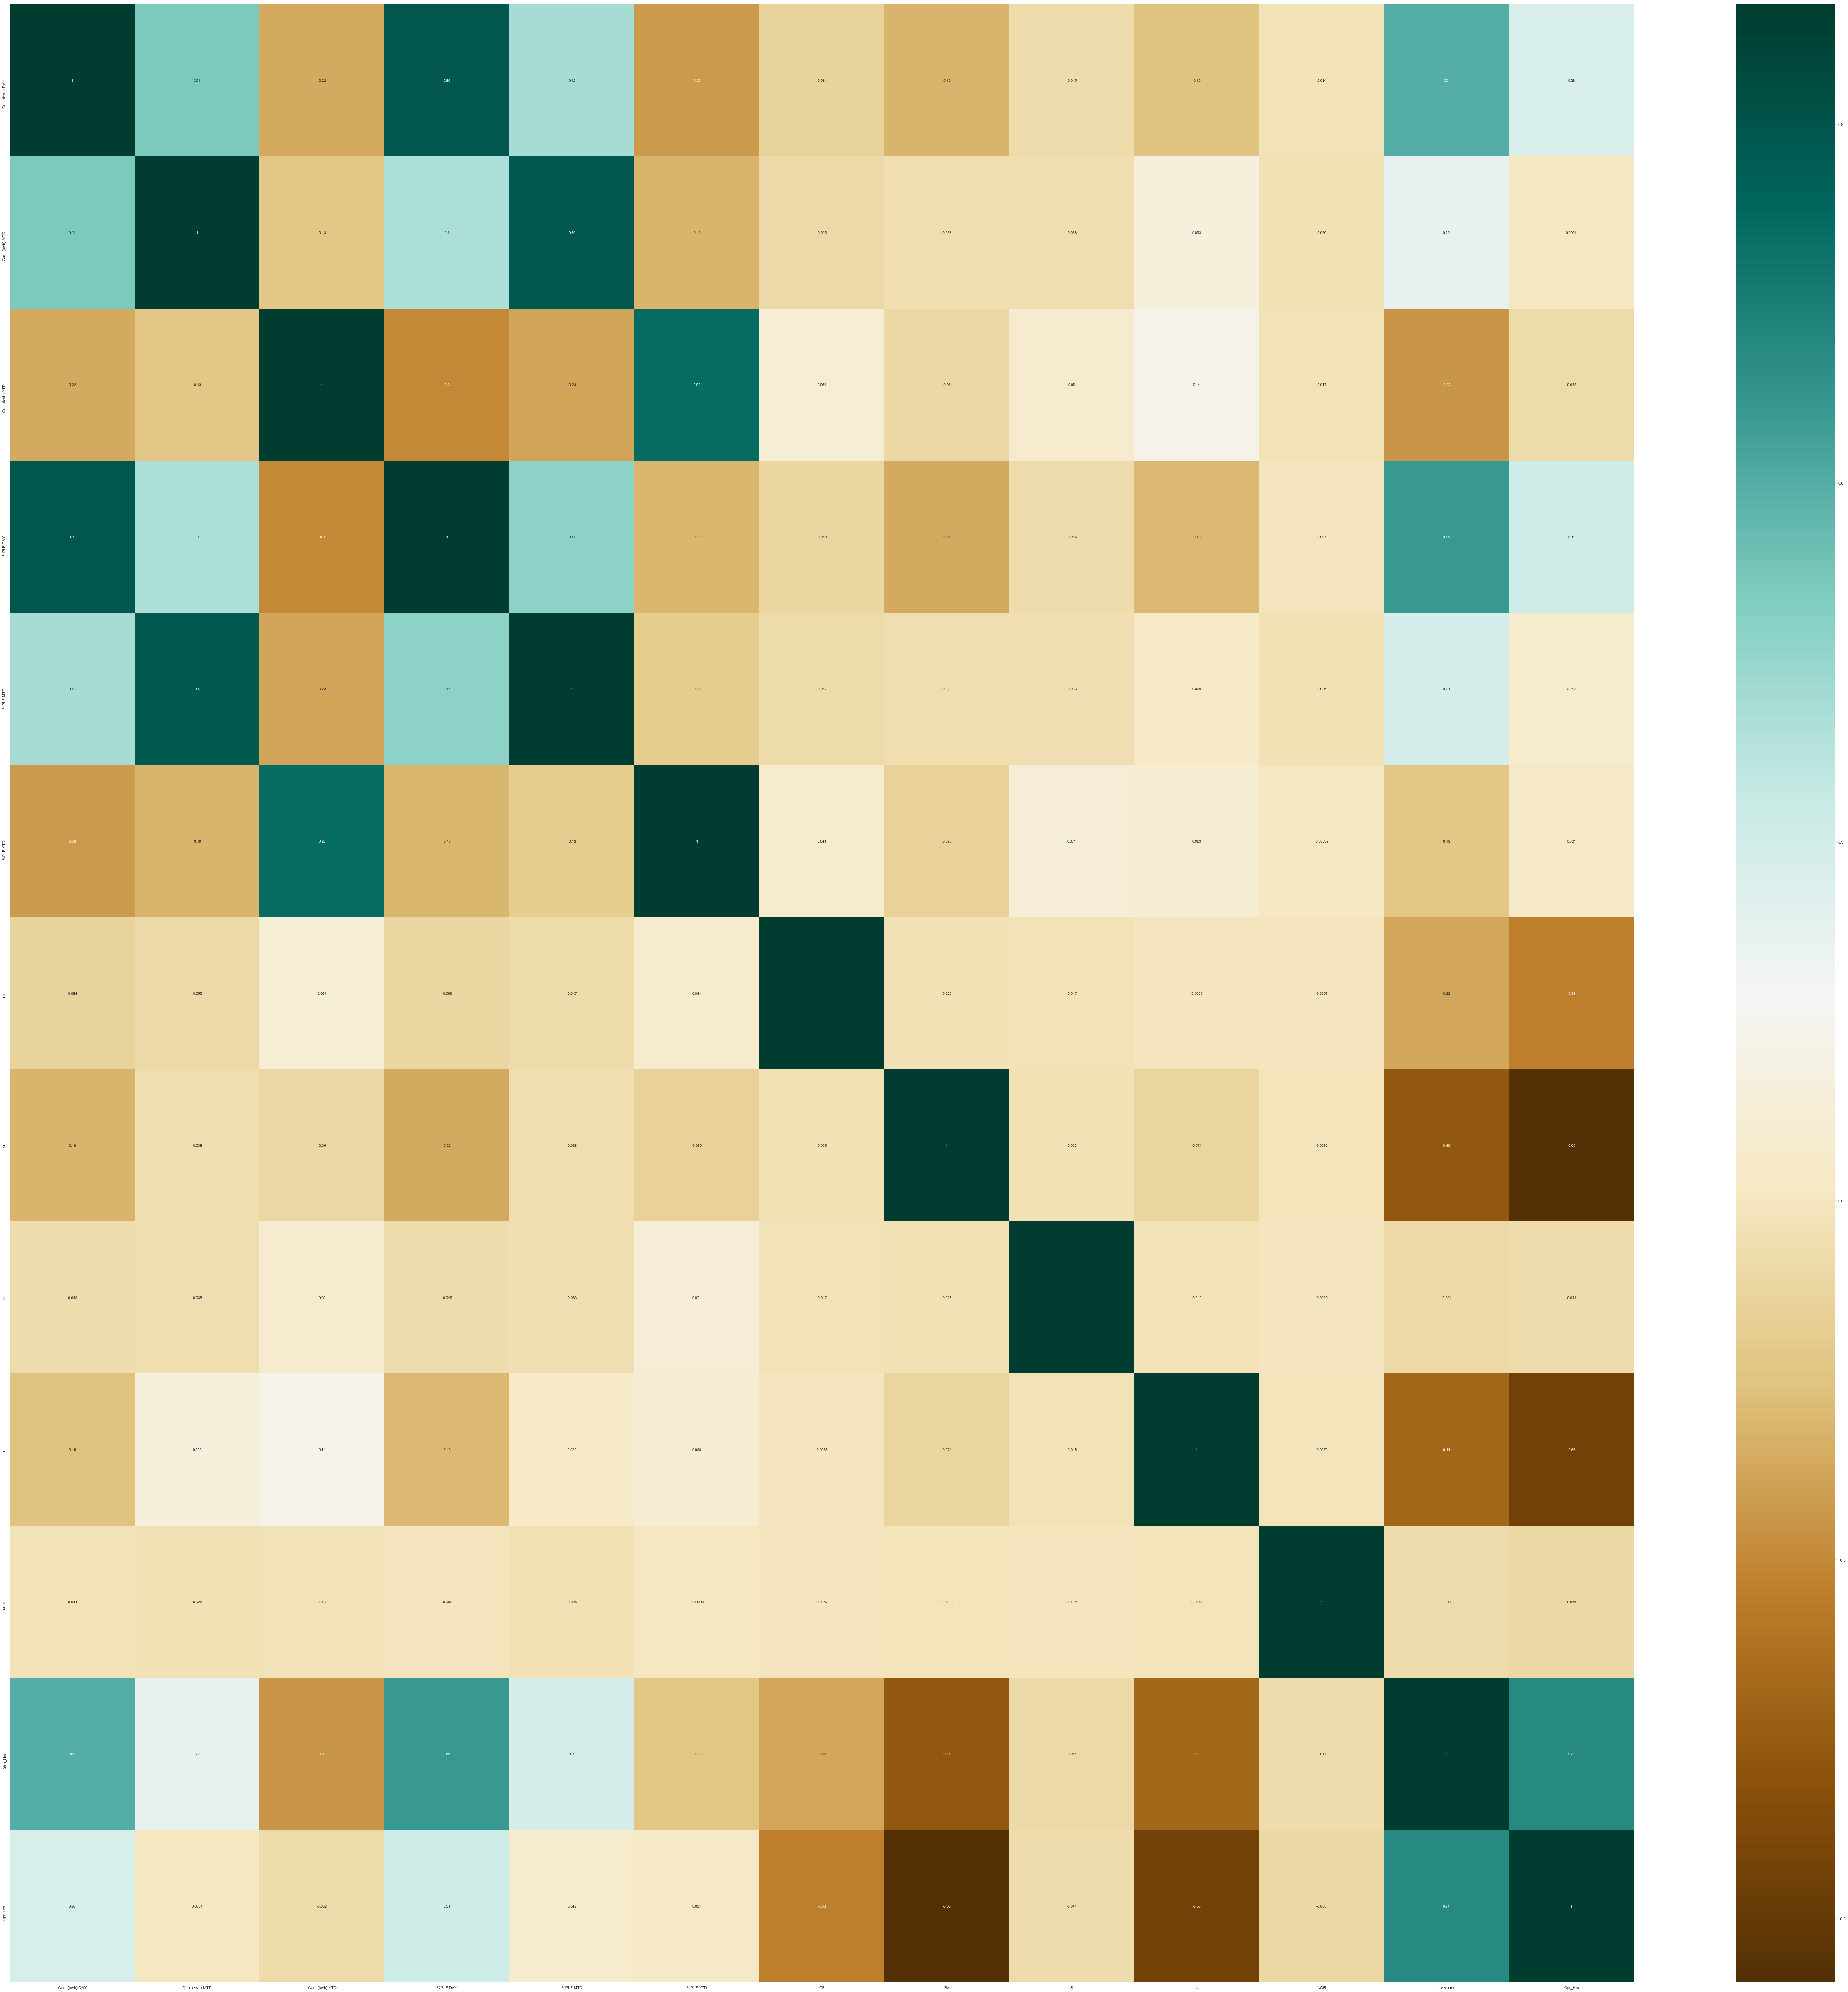

In [14]:
plt.figure(figsize=(100,100))
c = gend.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

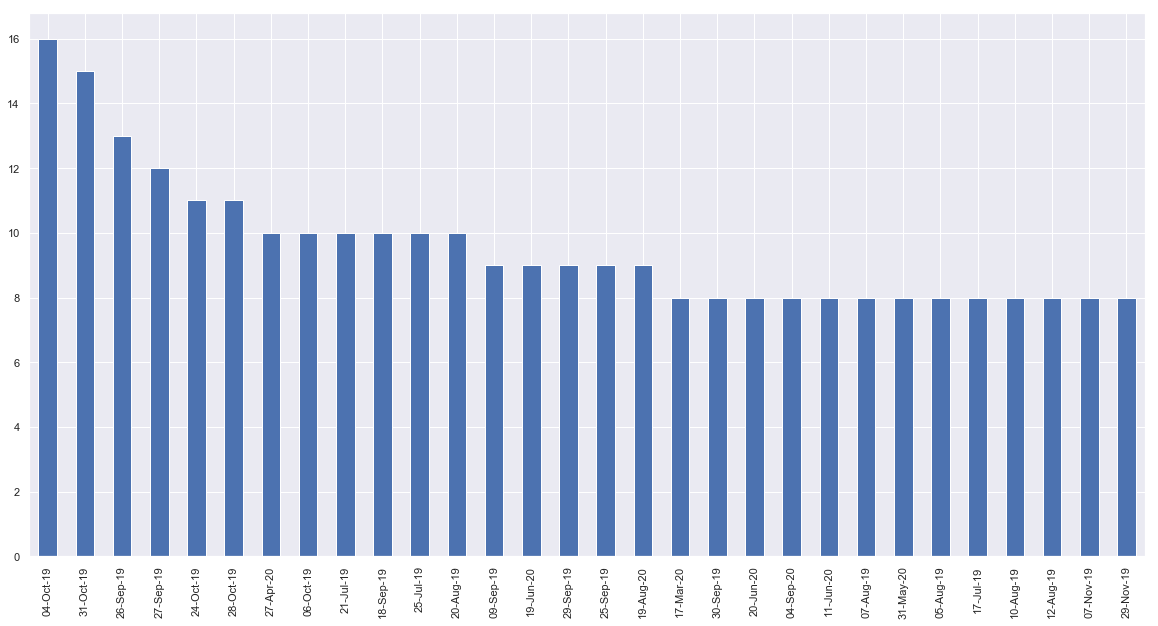

In [15]:
bred.Gen_Date.value_counts().nlargest(30).plot(kind='bar', figsize=(20,10))

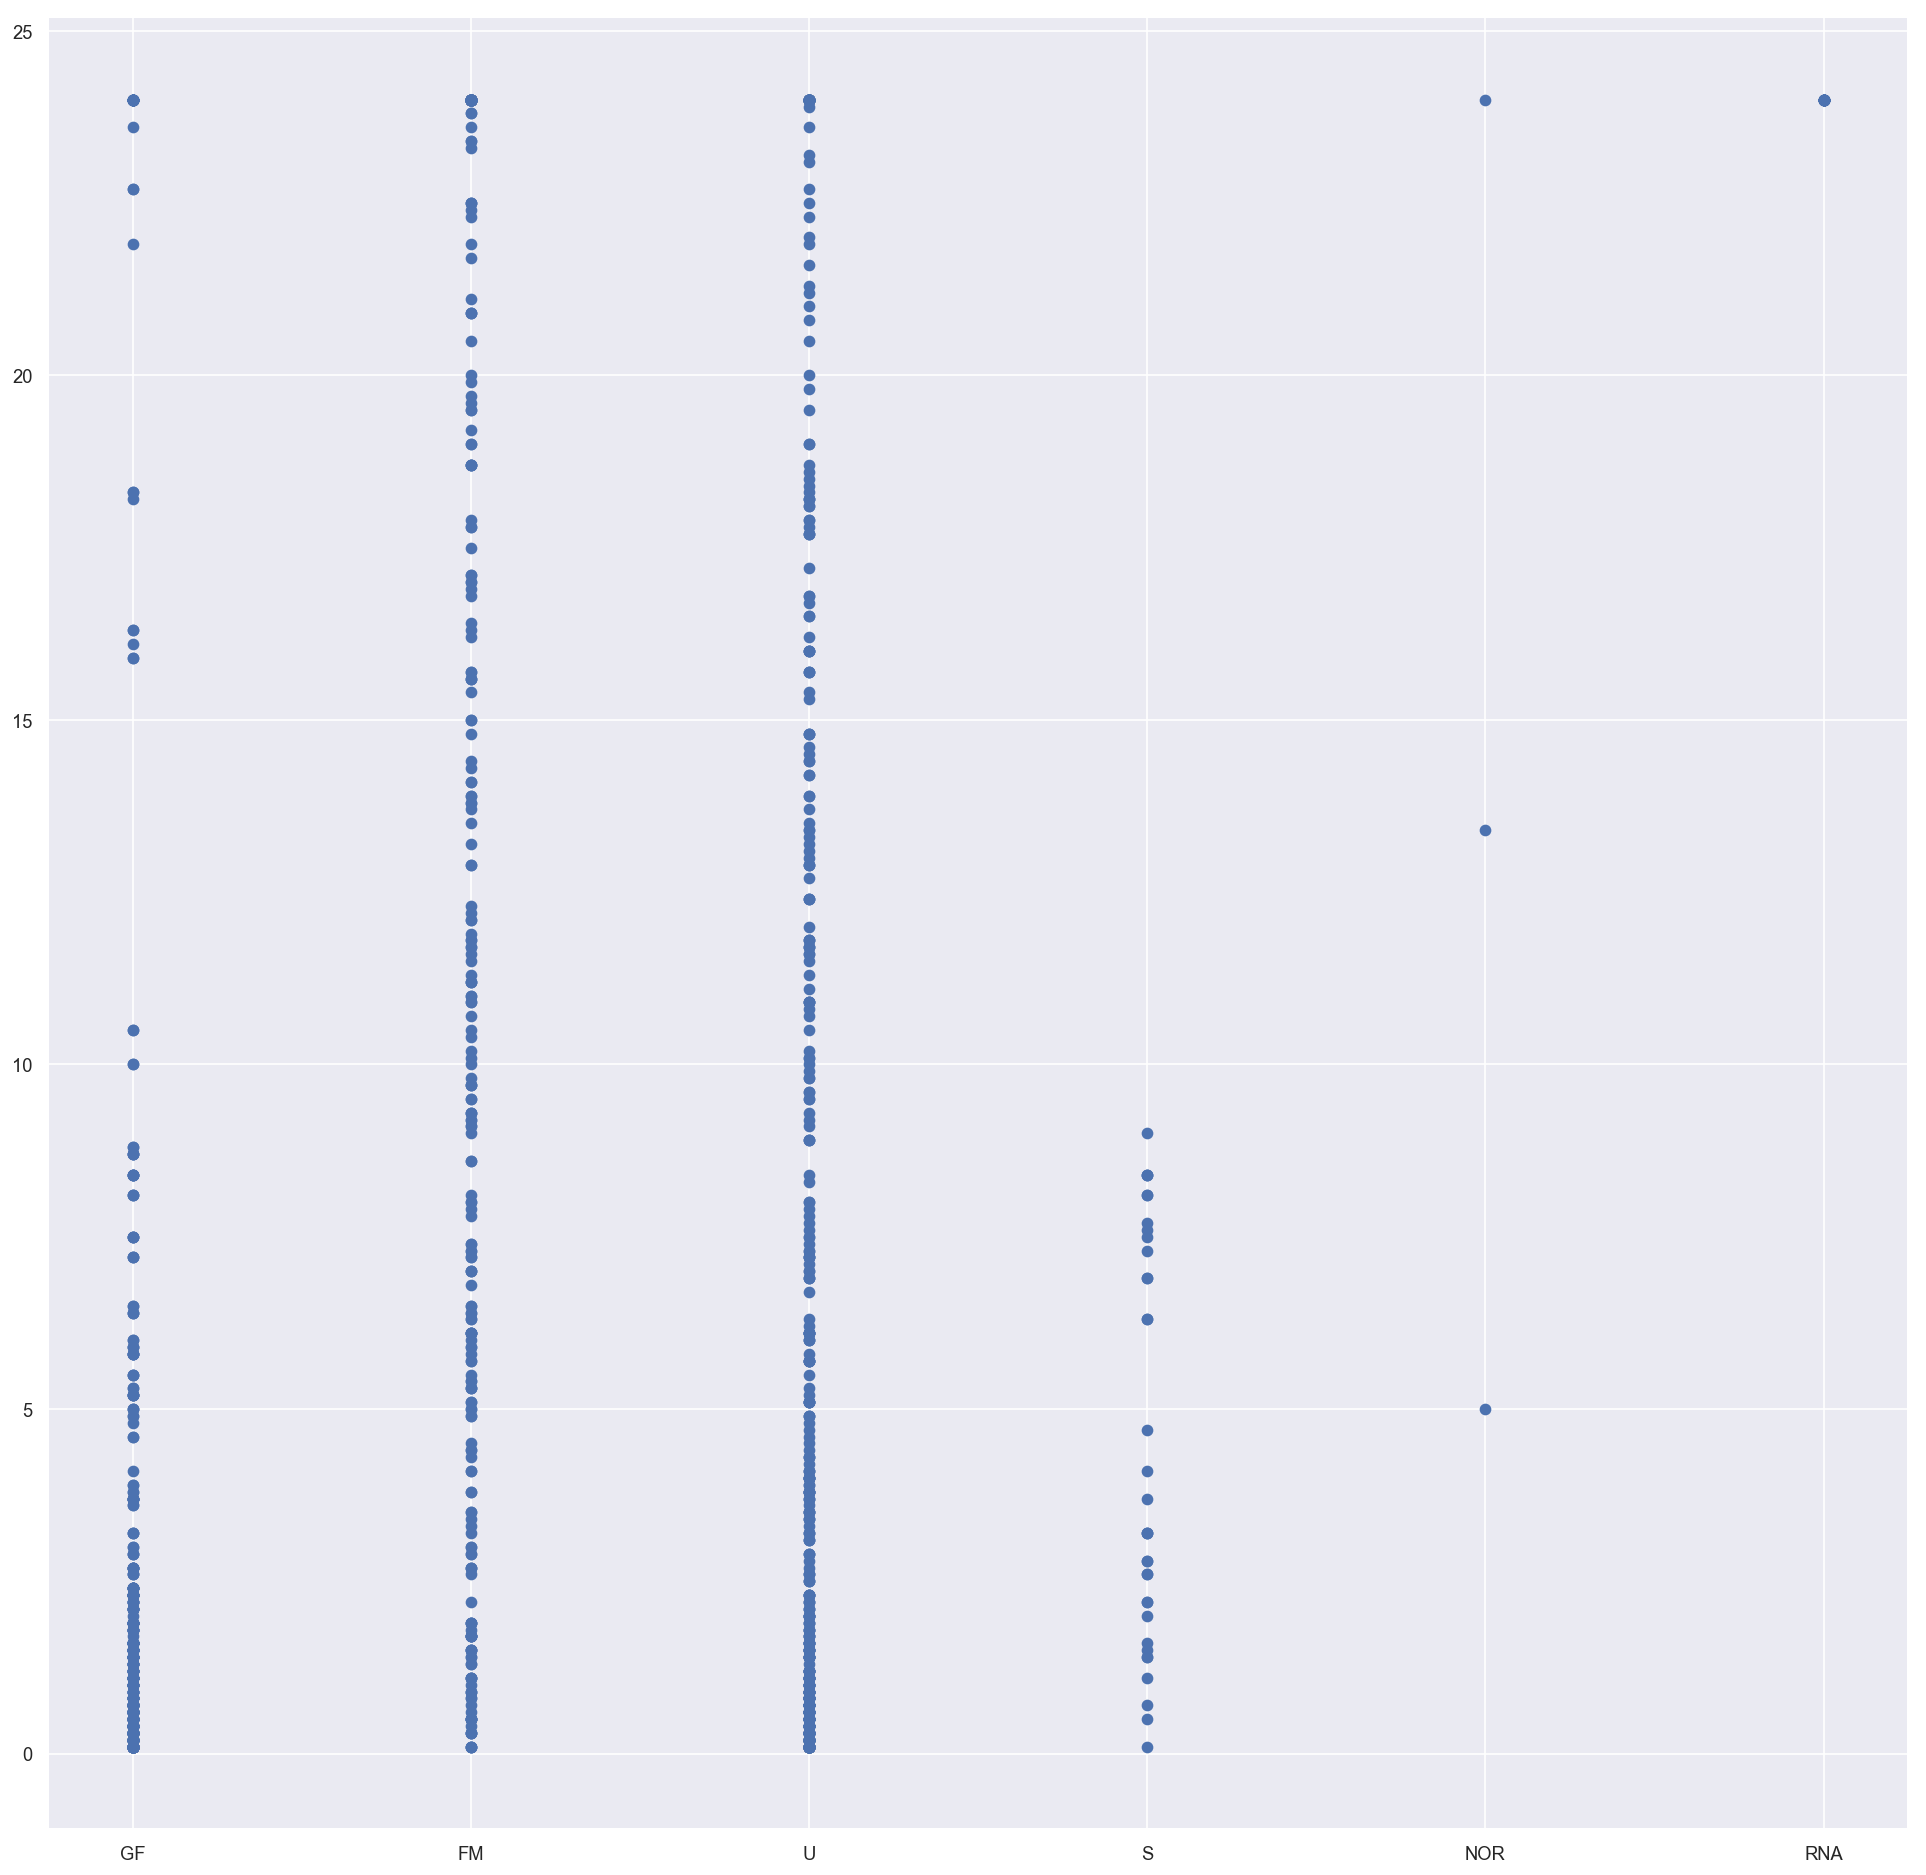

In [16]:
plt.figure(figsize=(20,20), dpi=120)
plt.scatter(x = bred['Formula_Parameter'], y = bred['Breakdown_Hrs.'])

In [17]:
gend['MND']= gend['MND'].replace({'*':0})
gend['MND']= gend['MND'].replace({'**':0})
gend

,Gen_Date,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,MND,GF,FM,S,U,NOR,Gen_Hrs,Opr_Hrs,FY
0,01-Apr-19,6884,6884,6884,22.95,0.76,0.06,100,0.0,0.0,0.0,0.0,0.0,21.1,24.0,19-20
1,02-Apr-19,4781,11665,11665,15.94,1.30,0.11,100,0.0,0.0,0.0,0.0,0.0,19.4,24.0,19-20
2,03-Apr-19,4714,16379,16379,15.71,1.82,0.15,100,0.0,0.0,0.0,0.0,0.0,17.3,24.0,19-20
3,04-Apr-19,4136,20515,20515,13.79,2.28,0.19,100,0.0,0.0,0.0,0.0,0.0,17.2,24.0,19-20
4,05-Apr-19,8783,29298,29298,29.28,3.26,0.27,100,0.0,0.0,0.0,0.0,0.0,21.2,24.0,19-20
5,06-Apr-19,7566,36864,36864,25.22,4.10,0.34,100,0.0,0.0,0.0,0.0,0.0,21.3,24.0,19-20
6,07-Apr-19,13616,50480,50480,45.39,5.61,0.46,100,0.0,0.0,0.0,0.0,0.0,23.7,24.0,19-20
7,08-Apr-19,7942,58422,58422,26.47,6.49,0.53,100,0.0,0.0,0.0,0.0,0.0,21.2,24.0,19-20
8,09-Apr-19,12597,71019,71019,41.99,7.89,0.65,100,0.0,0.0,0.0,0.0,0.0,23.3,24.0,19-20
9,10-Apr-19,6523,77542,77542,21.74,8.62,0.71,100,0.0,0.0,0.0,0.0,0.0,21.4,24.0,19-20


In [18]:
gend['MND'] = pd.to_numeric(gend['MND'], errors = 'coerce')
gend.dtypes

Gen_Date           object
Gen. (kwh) DAY      int64
Gen. (kwh) MTD      int64
Gen. (kwh) YTD      int64
%PLF DAY          float64
%PLF MTD          float64
%PLF YTD          float64
MND               float64
GF                float64
FM                float64
S                 float64
U                 float64
NOR               float64
Gen_Hrs           float64
Opr_Hrs           float64
FY                 object
dtype: object

In [19]:
fm = gend.loc[gend['FM']!=0]
fm

,Gen_Date,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,MND,GF,FM,S,U,NOR,Gen_Hrs,Opr_Hrs,FY
14,15-Apr-19,3579,102129,102129,11.93,11.35,0.93,100.00,0.0,1.1,0.0,0.0,0.0,12.7,22.9,19-20
71,11-Jun-19,3861,175025,673480,12.87,19.45,6.15,100.00,0.0,6.1,0.0,0.0,0.0,12.4,17.9,19-20
72,12-Jun-19,2530,177555,676010,8.43,19.73,6.17,57.33,0.0,1.5,0.0,9.6,0.0,9.0,12.9,19-20
83,23-Jun-19,11597,277813,776268,38.66,30.87,7.09,100.00,0.0,1.7,0.0,0.0,0.0,21.8,22.3,19-20
109,19-Jul-19,3906,227052,1059248,13.02,24.41,9.67,100.00,0.0,0.3,0.0,0.0,0.0,19.5,23.7,19-20
116,26-Jul-19,23058,277595,1109791,76.86,29.85,10.14,100.00,0.0,0.1,0.0,0.0,0.0,23.4,23.9,19-20
127,06-Aug-19,0,73219,1285144,0.00,7.87,11.74,0.00,0.0,24.0,0.0,0.0,0.0,0.0,0.0,19-20
128,07-Aug-19,0,73219,1285144,0.00,7.87,11.74,0.00,0.0,24.0,0.0,0.0,0.0,0.0,0.0,19-20
129,08-Aug-19,0,73219,1285144,0.00,7.87,11.74,0.00,0.0,24.0,0.0,0.0,0.0,0.0,0.0,19-20
206,24-Oct-19,882,32703,1422855,2.94,3.52,12.99,100.00,0.0,9.5,0.0,0.0,0.0,12.1,14.5,19-20


In [20]:
gf = gend.loc[gend['GF']!=0]
gf

,Gen_Date,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,MND,GF,FM,S,U,NOR,Gen_Hrs,Opr_Hrs,FY
13,14-Apr-19,7301,98550,98550,24.34,10.95,0.90,100.00,2.2,0.0,0.0,0.0,0.0,16.2,21.8,19-20
38,09-May-19,7661,94241,280196,25.54,10.13,2.56,62.82,8.4,0.0,0.0,5.8,0.0,9.3,9.8,19-20
41,12-May-19,10839,122338,308293,36.13,13.15,2.82,97.87,0.5,0.0,0.0,0.5,0.0,20.2,23.0,19-20
47,18-May-19,5903,184996,370951,19.68,19.89,3.39,94.97,8.1,0.0,0.0,0.8,0.0,14.4,15.1,19-20
93,03-Jul-19,12907,32098,864294,43.02,3.45,7.89,100.00,0.1,0.0,0.0,0.0,0.0,23.6,23.9,19-20
101,11-Jul-19,12699,130534,962730,42.33,14.04,8.79,100.00,6.4,0.0,0.0,0.0,0.0,17.1,17.6,19-20
111,21-Jul-19,428,229869,1062065,1.43,24.72,9.70,54.33,3.2,0.0,0.0,9.5,0.0,8.0,11.3,19-20
114,24-Jul-19,4596,237120,1069316,15.32,25.50,9.77,100.00,0.6,0.0,0.0,0.0,0.0,21.3,23.4,19-20
115,25-Jul-19,17417,254537,1086733,58.06,27.37,9.92,99.58,0.1,0.0,0.0,0.1,0.0,23.6,23.8,19-20
117,27-Jul-19,20172,297767,1129963,67.24,32.02,10.32,85.19,2.4,0.0,0.0,3.2,0.0,17.5,18.4,19-20


In [21]:
s = gend.loc[gend['S']!=0]
s

,Gen_Date,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,MND,GF,FM,S,U,NOR,Gen_Hrs,Opr_Hrs,FY
24,25-Apr-19,7936,161227,161227,26.45,17.91,1.47,93.33,0.0,0.0,1.6,0.0,0.0,19.5,22.4,19-20
200,18-Oct-19,464,25053,1415205,1.55,2.69,12.92,67.92,0.0,0.0,7.7,0.0,0.0,9.8,16.3,19-20
312,07-Feb-20,672,11391,1560521,2.24,1.31,14.25,69.58,0.0,0.0,7.3,0.0,0.0,4.7,16.7,19-20
345,11-Mar-20,6034,49543,1635465,20.11,5.33,14.94,97.92,0.0,0.0,0.5,0.0,0.0,21.2,23.5,19-20
371,02-Apr-19,5509,12864,12864,18.36,1.43,0.12,82.92,0.0,0.0,4.1,0.0,0.0,16.7,19.9,19-20
641,08-Jun-19,3246,30455,198486,22.54,7.05,3.78,97.08,0.0,0.0,0.7,0.0,0.0,22.9,23.3,19-20
672,16-Jun-19,14079,59148,237856,97.77,13.69,4.53,99.57,0.7,0.0,0.1,0.0,0.0,23.1,23.2,19-20
739,03-Jul-19,3720,3720,670914,12.40,0.40,6.13,32.22,0.1,0.0,2.0,14.2,0.0,7.4,7.7,19-20
1085,27-Sep-19,60,65856,662845,0.42,15.24,12.61,86.67,0.0,0.0,3.2,0.0,0.0,4.2,20.8,19-20
1092,29-Sep-19,8703,77756,738274,60.44,18.00,14.05,90.72,0.3,0.0,2.2,0.0,0.0,20.6,21.5,19-20


In [22]:
u = gend.loc[gend['U']!=0]
u

,Gen_Date,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,MND,GF,FM,S,U,NOR,Gen_Hrs,Opr_Hrs,FY
15,16-Apr-19,2668,104797,104797,8.89,11.64,0.96,94.17,0.0,0.0,0.0,1.4,0.0,13.7,22.6,19-20
22,23-Apr-19,7705,143636,143636,25.68,15.96,1.31,99.58,0.0,0.0,0.0,0.1,0.0,15.8,23.9,19-20
26,27-Apr-19,2840,167702,167702,9.47,18.63,1.53,83.33,0.0,0.0,0.0,4.0,0.0,13.8,20.0,19-20
31,02-May-19,7267,15700,201655,24.22,1.69,1.84,44.58,0.0,0.0,0.0,13.3,0.0,10.3,10.7,19-20
32,03-May-19,19614,35314,221269,65.38,3.80,2.02,96.67,0.0,0.0,0.0,0.8,0.0,23.1,23.2,19-20
33,04-May-19,6312,41626,227581,21.04,4.48,2.08,43.75,0.0,0.0,0.0,13.5,0.0,10.3,10.5,19-20
36,07-May-19,11292,75716,261671,37.64,8.14,2.39,97.50,0.0,0.0,0.0,0.6,0.0,21.1,23.4,19-20
37,08-May-19,10864,86580,272535,36.21,9.31,2.49,79.58,0.0,0.0,0.0,4.9,0.0,18.2,19.1,19-20
38,09-May-19,7661,94241,280196,25.54,10.13,2.56,62.82,8.4,0.0,0.0,5.8,0.0,9.3,9.8,19-20
39,10-May-19,8277,102518,288473,27.59,11.02,2.63,75.00,0.0,0.0,0.0,6.0,0.0,16.0,18.0,19-20


In [23]:
nor = gend.loc[gend['NOR']!=0]
nor

,Gen_Date,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,MND,GF,FM,S,U,NOR,Gen_Hrs,Opr_Hrs,FY
857,01-Aug-19,6414,6414,470382,44.54,1.44,8.95,96.26,0.3,0.0,0.0,0.7,5.0,17.8,18.0,19-20
861,02-Aug-19,0,6414,470382,0.00,1.44,8.95,0.00,0.0,0.0,0.0,0.0,24.0,0.0,0.0,19-20
865,03-Aug-19,4200,10614,474582,29.17,2.38,9.03,100.00,0.0,0.0,0.0,0.0,13.4,10.5,10.6,19-20


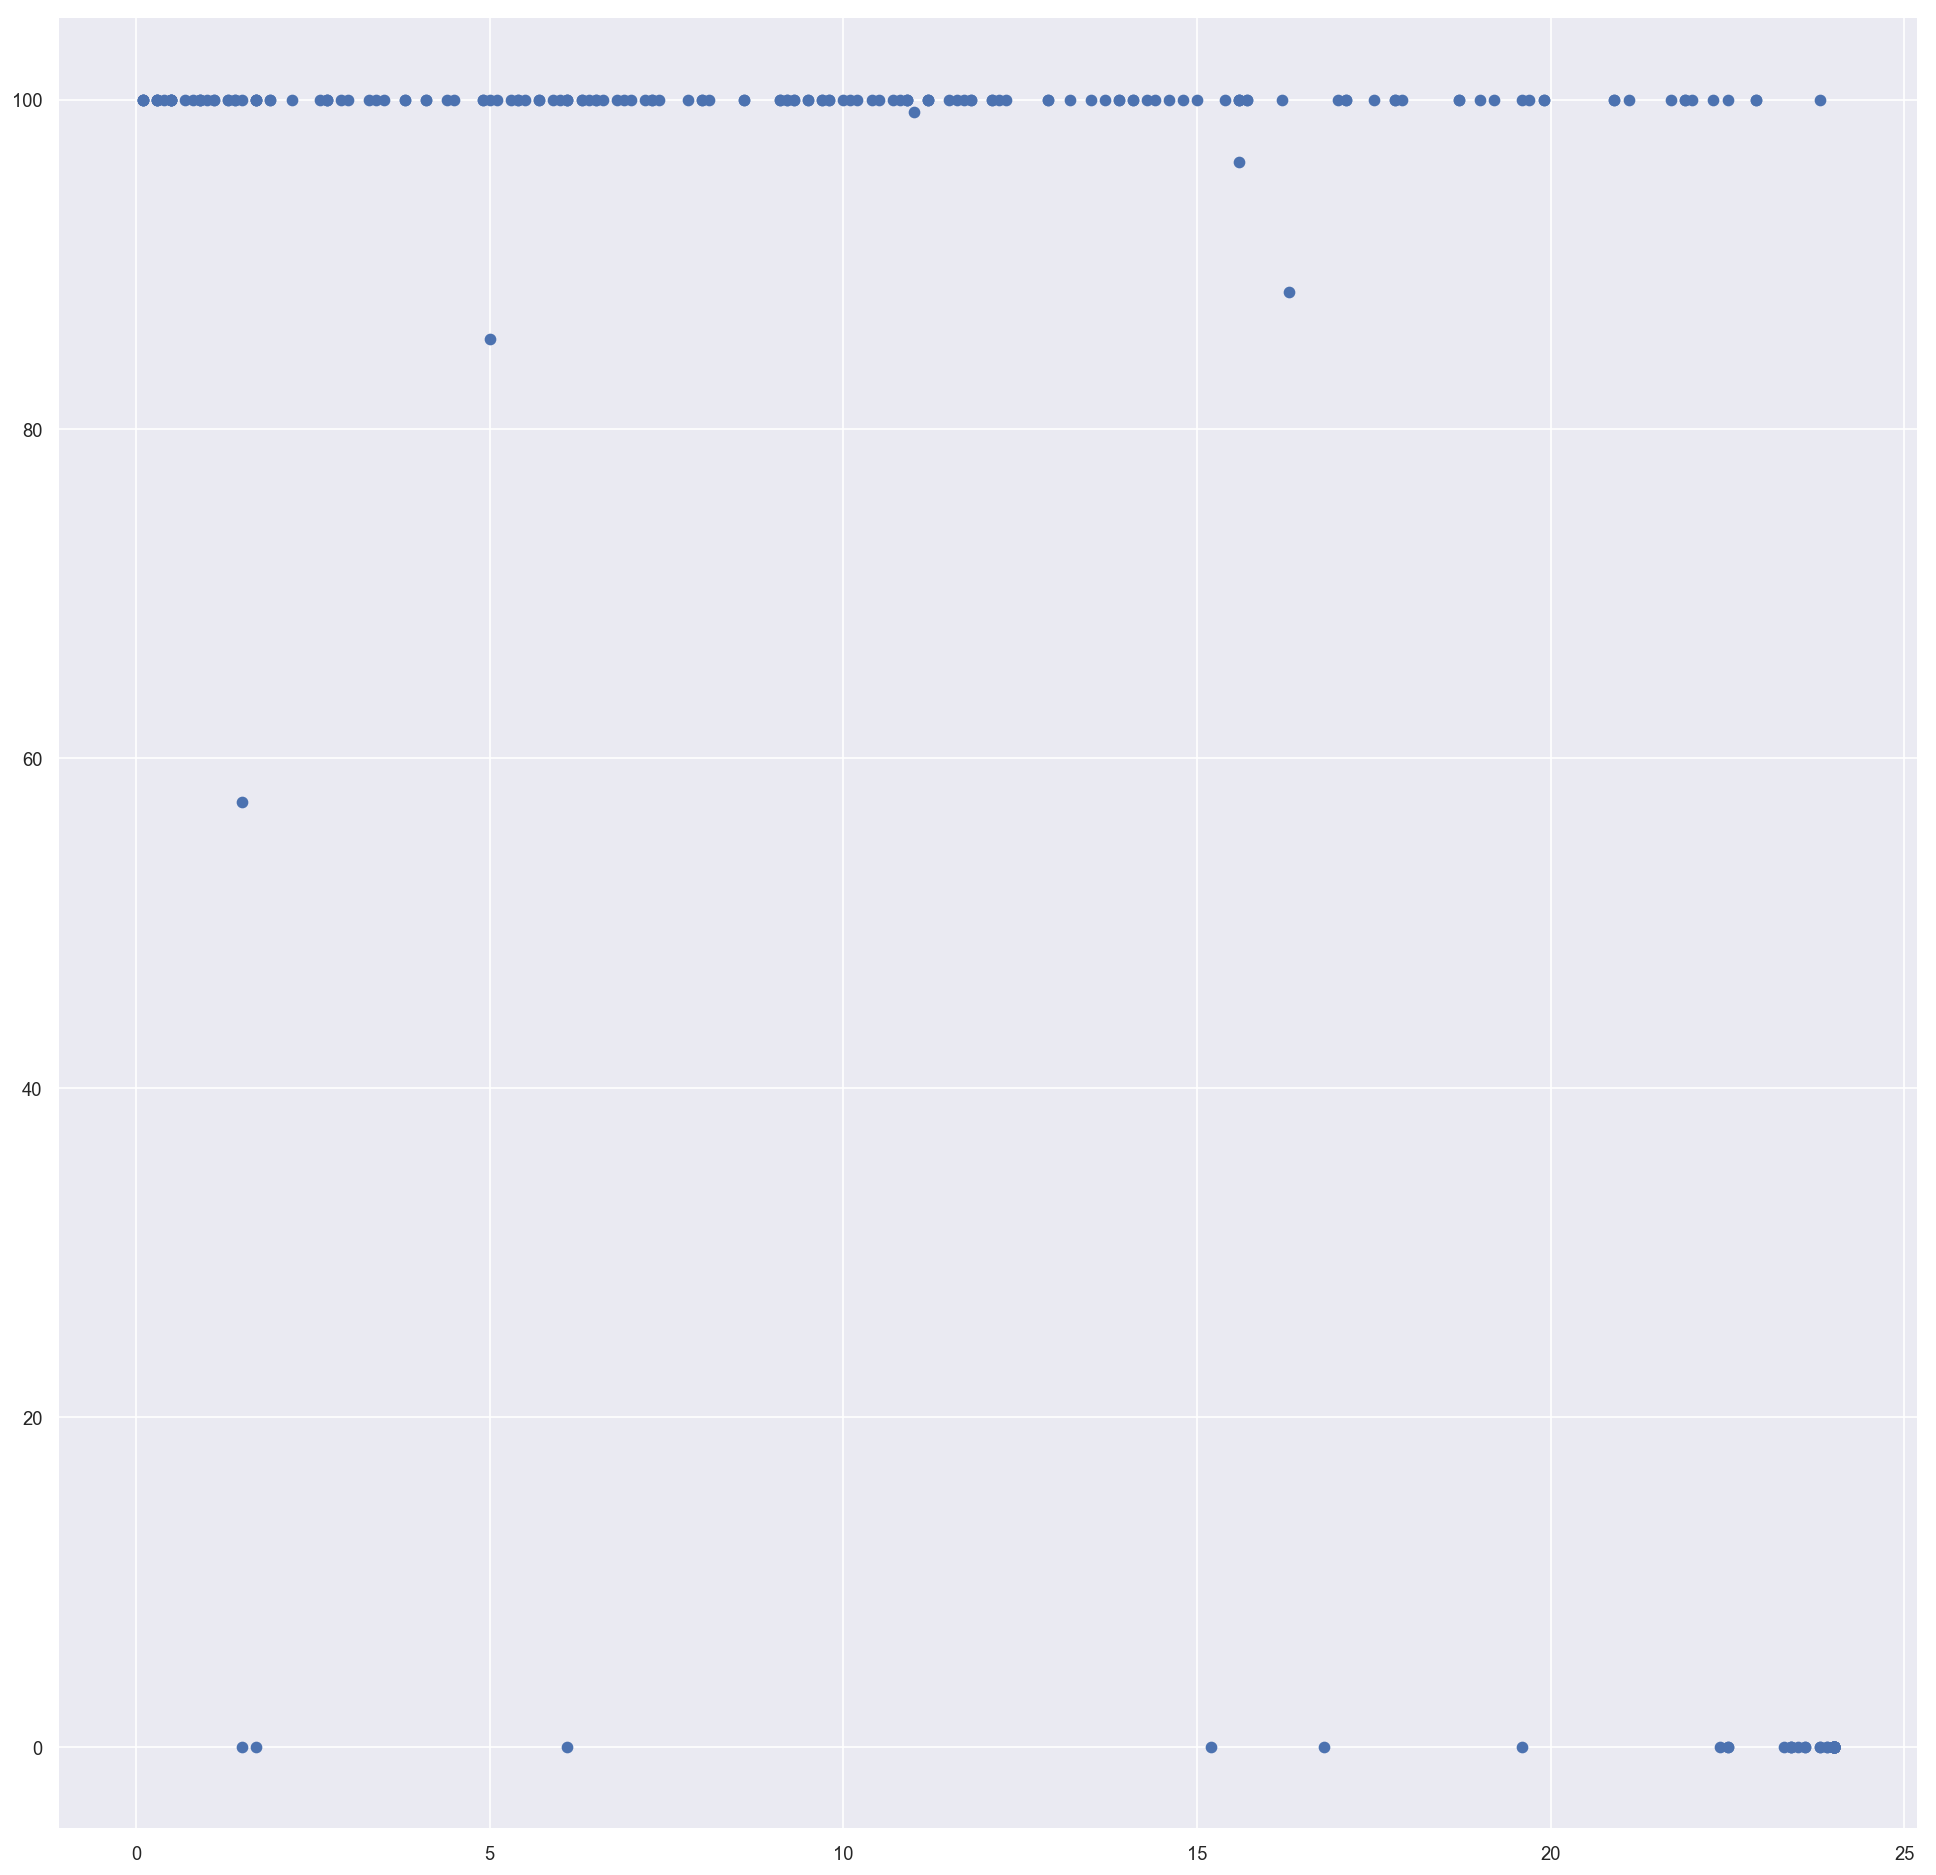

In [24]:
plt.figure(figsize=(20,20), dpi=120)
plt.scatter(x = fm['FM'], y = fm['MND'])

In [25]:
gend

,Gen_Date,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,MND,GF,FM,S,U,NOR,Gen_Hrs,Opr_Hrs,FY
0,01-Apr-19,6884,6884,6884,22.95,0.76,0.06,100.00,0.0,0.0,0.0,0.0,0.0,21.1,24.0,19-20
1,02-Apr-19,4781,11665,11665,15.94,1.30,0.11,100.00,0.0,0.0,0.0,0.0,0.0,19.4,24.0,19-20
2,03-Apr-19,4714,16379,16379,15.71,1.82,0.15,100.00,0.0,0.0,0.0,0.0,0.0,17.3,24.0,19-20
3,04-Apr-19,4136,20515,20515,13.79,2.28,0.19,100.00,0.0,0.0,0.0,0.0,0.0,17.2,24.0,19-20
4,05-Apr-19,8783,29298,29298,29.28,3.26,0.27,100.00,0.0,0.0,0.0,0.0,0.0,21.2,24.0,19-20
5,06-Apr-19,7566,36864,36864,25.22,4.10,0.34,100.00,0.0,0.0,0.0,0.0,0.0,21.3,24.0,19-20
6,07-Apr-19,13616,50480,50480,45.39,5.61,0.46,100.00,0.0,0.0,0.0,0.0,0.0,23.7,24.0,19-20
7,08-Apr-19,7942,58422,58422,26.47,6.49,0.53,100.00,0.0,0.0,0.0,0.0,0.0,21.2,24.0,19-20
8,09-Apr-19,12597,71019,71019,41.99,7.89,0.65,100.00,0.0,0.0,0.0,0.0,0.0,23.3,24.0,19-20
9,10-Apr-19,6523,77542,77542,21.74,8.62,0.71,100.00,0.0,0.0,0.0,0.0,0.0,21.4,24.0,19-20


In [26]:
apr = gend.loc[gend['Gen_Date'].str.contains('Apr-20')]

In [27]:
type(gend)

pandas.core.frame.DataFrame

In [28]:
apr

,Gen_Date,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,MND,GF,FM,S,U,NOR,Gen_Hrs,Opr_Hrs,FY
1830,01-Apr-20,0,0,0,0.00,0.00,0.00,0.00,0.0,24.0,0.0,0.0,0.0,0.0,0.0,20-21
1831,01-Apr-20,4202,4202,4202,14.01,0.47,0.04,100.00,0.0,0.0,0.0,0.0,0.0,20.8,24.0,20-21
1832,01-Apr-20,2179,2179,2179,15.13,0.50,0.04,93.33,1.5,0.0,0.0,1.5,0.0,17.3,21.0,20-21
1833,01-Apr-20,154,154,154,1.07,0.04,0.00,100.00,1.5,10.9,0.0,0.0,0.0,6.2,11.6,20-21
1834,02-Apr-20,0,0,0,0.00,0.00,0.00,0.00,0.0,24.0,0.0,0.0,0.0,0.0,0.0,20-21
1835,02-Apr-20,638,4840,4840,2.13,0.54,0.04,100.00,0.0,0.0,0.0,0.0,0.0,8.6,24.0,20-21
1836,02-Apr-20,3534,5713,5713,24.54,1.32,0.11,100.00,0.0,0.0,0.0,0.0,0.0,22.7,24.0,20-21
1837,02-Apr-20,1750,1904,1904,12.15,0.44,0.04,100.00,0.0,15.6,0.0,0.0,0.0,8.0,8.4,20-21
1838,03-Apr-20,0,0,0,0.00,0.00,0.00,0.00,0.0,24.0,0.0,0.0,0.0,0.0,0.0,20-21
1839,03-Apr-20,1079,5919,5919,3.60,0.66,0.05,100.00,0.0,0.0,0.0,0.0,0.0,13.0,24.0,20-21


In [ ]:
months = ['Apr-19', 'Apr-20', 'May-19', 'May-20', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19','Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20']

# FM PLOT VS MONTHS

In [ ]:
apr19 = gend.loc[gend['Gen_Date'].str.contains('Apr-19')]
apr19
apr20 = gend.loc[gend['Gen_Date'].str.contains('Apr-20')]
may19 = gend.loc[gend['Gen_Date'].str.contains('May-19')]
may20 = gend.loc[gend['Gen_Date'].str.contains('May-20')]
jun19 = gend.loc[gend['Gen_Date'].str.contains('Jun-19')]
jun20 = gend.loc[gend['Gen_Date'].str.contains('Jun-20')]
jul19 = gend.loc[gend['Gen_Date'].str.contains('Jul-19')]
jul20 = gend.loc[gend['Gen_Date'].str.contains('Jul-20')]
aug19 = gend.loc[gend['Gen_Date'].str.contains('Aug-19')]
aug20 = gend.loc[gend['Gen_Date'].str.contains('Aug-20')]
sep19 = gend.loc[gend['Gen_Date'].str.contains('Sep-19')]
sep20 = gend.loc[gend['Gen_Date'].str.contains('Sep-20')]
oct19 = gend.loc[gend['Gen_Date'].str.contains('Oct-19')]
nov19 = gend.loc[gend['Gen_Date'].str.contains('Nov-19')]
dec19 = gend.loc[gend['Gen_Date'].str.contains('Dec-19')]
jan20 = gend.loc[gend['Gen_Date'].str.contains('Jan-20')]
feb20 = gend.loc[gend['Gen_Date'].str.contains('Feb-20')]
mar20 = gend.loc[gend['Gen_Date'].str.contains('Mar-20')]

In [ ]:
apr19

<BarContainer object of 15 artists>

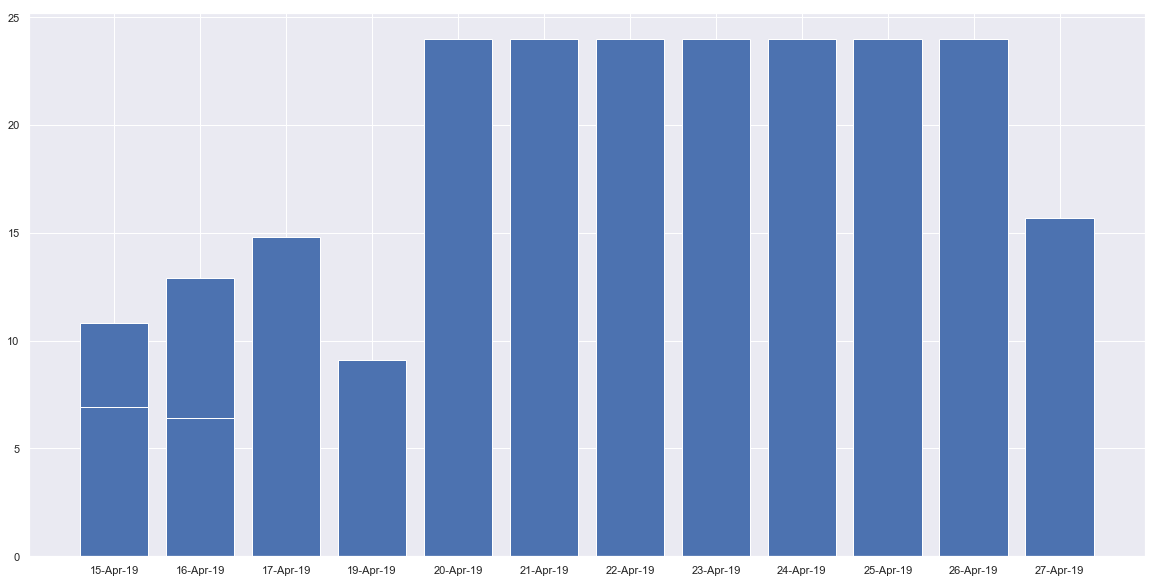

In [72]:
apr19 = apr19.loc[apr19['FM']!=0]
fig = plt.figure(figsize =(20, 10))
plt.bar(apr19['Gen_Date'],apr19['FM'])

In [35]:
bred.rename(columns={'Breakdown Remark': 'Breakdown_Remark', 'Formula Parameter': 'Formula_Parameter','Breakdown Hrs.': 'Breakdown_Hrs.'}, inplace=True)

In [37]:
bred.columns

Index(['Gen_Date', 'MW', 'Loc_No', 'Formula_Parameter', 'Breakdown_Remark',
       'FY', 'Breakdown_Hrs.'],
      dtype='object')

In [39]:
bred['Breakdown_Remark'].dtype 

dtype('O')

In [44]:
from graphviz import Source
temp = """
digraph Tree {
node [shape=box] ;
0 [label="Production Cost <= 45.5\nmse = 64.108\nsamples = 1503\nvalue = 6.127"] ;
1 [label="Production Cost <= 35.5\nmse = 43.001\nsamples = 843\nvalue = 3.651"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="mse = 64.815\nsamples = 472\nvalue = 5.822"] ;
1 -> 2 ;
3 [label="mse = 1.627\nsamples = 371\nvalue = 0.889"] ;
1 -> 3 ;
4 [label="Production Cost <= 93.5\nmse = 73.241\nsamples = 660\nvalue = 9.289"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="mse = 63.629\nsamples = 447\nvalue = 7.538"] ;
4 -> 5 ;
6 [label="mse = 73.476\nsamples = 213\nvalue = 12.963"] ;
4 -> 6 ;
}
"""
s = Source(temp, filename="test.gv", format="png")
s.view()

'test.gv.png'

# DECISION TREE REGRESSOR

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for (Breakdown_Remark) in bred.iteritems():
    if bred['Breakdown_Remark'].dtype == object:
        bred['Breakdown_Remark'] = le.fit_transform(bred['Breakdown_Remark'])
    else:
        pass
for (Formula_Parameter) in bred.iteritems():
    if bred['Formula_Parameter'].dtype == object:
        bred['Formula_Parameter'] = le.fit_transform(bred['Formula_Parameter'])
    else:
        pass
regressor2 = DecisionTreeRegressor(max_depth=3)
#bred['Breakdown_Remark'].values.reshape(1, -1)
#bred['Breakdown_Hrs.'].values.reshape(1, -1)
#X = [bred['Breakdown_Remark'],bred['Formula_Parameter']]
#Y = bred['Breakdown_Hrs.']
#regressor2.fit(X, Y)
regressor2.fit(X, Y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
X = bred['Breakdown_Remark'].values
y = bred['Breakdown_Hrs.'].values

In [47]:
X

array([25, 41, 55, ..., 97, 97, 38])

In [48]:
y

array([ 0.4,  1.8,  1.1, ..., 20. ,  2.9,  0.2])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [51]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [52]:
dfn = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
dfn

,Real Values,Predicted Values
0,0.3,1.350000
1,0.2,0.679021
2,24.0,24.000000
3,22.7,12.533333
4,1.5,1.350000
5,8.1,7.342857
6,0.6,0.600000
7,1.7,12.084211
8,0.1,1.901587
9,5.0,7.342857


In [53]:
dfn.head(51)

,Real Values,Predicted Values
0,0.3,1.350000
1,0.2,0.679021
2,24.0,24.000000
3,22.7,12.533333
4,1.5,1.350000
5,8.1,7.342857
6,0.6,0.600000
7,1.7,12.084211
8,0.1,1.901587
9,5.0,7.342857


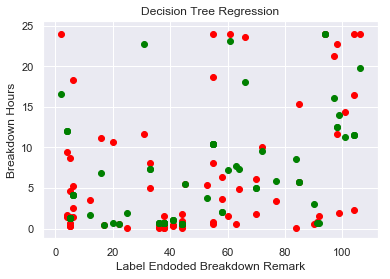

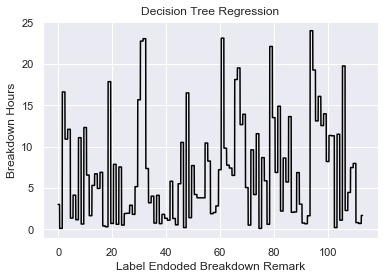

In [54]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Label Endoded Breakdown Remark')
plt.ylabel('Breakdown Hours')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Label Endoded Breakdown Remark')
plt.ylabel('Breakdown Hours')
plt.show()

In [54]:
predictedArray = y_pred.reshape(-1)

In [55]:
np.mean(predictedArray)

5.694386649147584

In [56]:
np.std(predictedArray)

6.005628579885063

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test.reshape(-1), y_pred.reshape(-1))

0.5999936947231644

In [58]:
from scipy.stats import variation
variation(predictedArray)

1.0546576742877252

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test.reshape(-1), y_pred.reshape(-1))

3.4457340395242517

# RANDOM FOREST

In [62]:

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressorn = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
X = bred[['Breakdown_Remark']]
Y = bred['Breakdown_Hrs.']
regressorn.fit(X, Y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [63]:
y_pred = regressorn.predict(X_test.reshape(-1,1))

In [64]:
dfnn = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
dfnn


,Real Values,Predicted Values
0,0.1,0.661297
1,0.6,0.688179
2,1.2,1.086435
3,0.5,2.187644
4,2.4,1.372309
...,...,...
71,0.5,1.578977
72,7.3,6.706660
73,7.2,2.878350
74,24.0,22.932724


In [65]:
dfnn.head(51)

,Real Values,Predicted Values
0,0.1,0.661297
1,0.6,0.688179
2,1.2,1.086435
3,0.5,2.187644
4,2.4,1.372309
5,9.1,8.412357
6,0.2,6.769371
7,0.6,1.372309
8,0.6,1.086435
9,24.0,15.593735


In [66]:
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file ='tree2.dot',
               feature_names =['Label Encoded Breakdown Remark ']) 

# MEAN APPROACH

In [81]:
bd =  pd.read_csv('Breakdown_Data.csv')
bd.rename(columns={'Breakdown Remark': 'Breakdown_Remark', 'Formula Parameter': 'Formula_Parameter','Breakdown Hrs.': 'Breakdown_Hrs'}, inplace=True)
bd.head()

,Gen. Date,MW,Loc. No.,Breakdown_Remark,Formula_Parameter,Breakdown_Hrs,FY
0,14-Apr-19,1.25,K410,Elec VoltageAsymmetry,GF,0.4,19-20
1,14-Apr-19,1.25,K410,INTL_Shut Down Taken By OMS,GF,1.8,19-20
2,15-Apr-19,1.25,K410,Natural Calamities,FM,1.1,19-20
3,16-Apr-19,1.25,K410,Mech Generator PeakSpeedStop,U,1.4,19-20
4,23-Apr-19,1.25,K410,Pitch ResolverEncoderDiff2Stop,U,0.1,19-20


In [1]:
l = {}

In [99]:
for i in bd.index :
    if bd['Breakdown_Remark'][i] in l.keys():
        x=bd['Breakdown_Hrs'][i]
        l[bd['Breakdown_Remark'][i]].append(x)
        
    else:
        x=bd['Breakdown_Hrs'][i]
        a = list()
        a.append(x)
        l[bd['Breakdown_Remark'][i]] = a
    #print (bd['Breakdown_Remark'][i], bd['Breakdown_Hrs'][i])

In [105]:
import statistics
for key,values in l.items():
    print(key," : ",statistics.mean(values))

Elec VoltageAsymmetry  :  1.8507692307692307
INTL_Shut Down Taken By OMS  :  1.0791666666666666
Natural Calamities  :  10.247169811320754
Mech Generator PeakSpeedStop  :  1.4
Pitch ResolverEncoderDiff2Stop  :  6.676923076923077
Quarterly Lubrication  :  1.625
Pitch Brake3 NotReleased  :  4.1869565217391305
Pitch FreqConvPitch2 ErrStop  :  6.67
Pitch EndSwitch2 LowStop  :  13.5
Pitch ResolverEncoderDiff3Stop  :  2.8461538461538463
Pitch Akku2Voltage LowStop  :  6.983333333333333
HT Line Maintenance  :  7.166666666666667
WireBreak BottomControlSection  :  1.6666666666666667
Pitch EmergencyRun  :  5.776666666666666
Rep Pitch EmergencyRun  :  13.08235294117647
INTL_Line Breakdown due to E/F  :  0.666
PSS_Equipment failure TRAF/CT/PT/Meter/etc  :  2.1725
WindPeak HighStop  :  0.7000000000000001
SE RebootPLC  :  11.661702127659574
Pitch FreqConvPitch1 ErrStop  :  8.0
Elec SafteyChainStop  :  17.845454545454544
Pitch FreqConvPitch3 ErrStop  :  13.616666666666667
PSS_Shut Down Taken By EB  :  

In [106]:
s = {}
for key,values in l.items():
    s[key] = statistics.mean(values)

In [107]:
s

{'Elec VoltageAsymmetry': 1.8507692307692307,
 'INTL_Shut Down Taken By OMS': 1.0791666666666666,
 'Natural Calamities': 10.247169811320754,
 'Mech Generator PeakSpeedStop': 1.4,
 'Pitch ResolverEncoderDiff2Stop': 6.676923076923077,
 'Quarterly Lubrication': 1.625,
 'Pitch Brake3 NotReleased': 4.1869565217391305,
 'Pitch FreqConvPitch2 ErrStop': 6.67,
 'Pitch EndSwitch2 LowStop': 13.5,
 'Pitch ResolverEncoderDiff3Stop': 2.8461538461538463,
 'Pitch Akku2Voltage LowStop': 6.983333333333333,
 'HT Line Maintenance': 7.166666666666667,
 'WireBreak BottomControlSection': 1.6666666666666667,
 'Pitch EmergencyRun': 5.776666666666666,
 'Rep Pitch EmergencyRun': 13.08235294117647,
 'INTL_Line Breakdown due to E/F': 0.666,
 'PSS_Equipment failure TRAF/CT/PT/Meter/etc': 2.1725,
 'WindPeak HighStop': 0.7000000000000001,
 'SE RebootPLC': 11.661702127659574,
 'Pitch FreqConvPitch1 ErrStop': 8.0,
 'Elec SafteyChainStop': 17.845454545454544,
 'Pitch FreqConvPitch3 ErrStop': 13.616666666666667,
 'PSS_Sh

In [109]:
myd = pd.DataFrame(s.items(), columns=['Breakdown_Remark', 'Breakdown_Hrs'])

In [110]:
myd

,Breakdown_Remark,Breakdown_Hrs
0,Elec VoltageAsymmetry,1.850769
1,INTL_Shut Down Taken By OMS,1.079167
2,Natural Calamities,10.247170
3,Mech Generator PeakSpeedStop,1.400000
4,Pitch ResolverEncoderDiff2Stop,6.676923
...,...,...
109,Pitch EndSwitch 5GradNeg Conv3,0.600000
110,Safety chain hub open,1.100000
111,ACB Tripped,3.000000
112,Pitch FB CLS Pinion SlewRingWarn,2.200000


## Prediction After Mean

In [119]:
for i in bd.index :
    try :
        print ("Remark : {} -  Actual : {} - Predicted : {} ".format(bd['Breakdown_Remark'][i], bd['Breakdown_Hrs'][i],s[bd['Breakdown_Remark'][i]]))
        
    except :
        pass

Remark : Elec VoltageAsymmetry -  Actual : 0.4 - Predicted : 1.8507692307692307 
Remark : INTL_Shut Down Taken By OMS -  Actual : 1.8 - Predicted : 1.0791666666666666 
Remark : Natural Calamities -  Actual : 1.1 - Predicted : 10.247169811320754 
Remark : Mech Generator PeakSpeedStop -  Actual : 1.4 - Predicted : 1.4 
Remark : Pitch ResolverEncoderDiff2Stop -  Actual : 0.1 - Predicted : 6.676923076923077 
Remark : Quarterly Lubrication -  Actual : 1.6 - Predicted : 1.625 
Remark : Pitch Brake3 NotReleased -  Actual : 4.0 - Predicted : 4.1869565217391305 
Remark : Pitch ResolverEncoderDiff2Stop -  Actual : 13.3 - Predicted : 6.676923076923077 
Remark : Pitch FreqConvPitch2 ErrStop -  Actual : 0.8 - Predicted : 6.67 
Remark : Pitch EndSwitch2 LowStop -  Actual : 13.5 - Predicted : 13.5 
Remark : Pitch ResolverEncoderDiff3Stop -  Actual : 0.6 - Predicted : 2.8461538461538463 
Remark : Pitch ResolverEncoderDiff3Stop -  Actual : 4.9 - Predicted : 2.8461538461538463 
Remark : Pitch Akku2Volta

Remark : Elec VoltageU2 HighStop -  Actual : 0.1 - Predicted : 2.9 
Remark : INTL_Line Breakdown due to E/F -  Actual : 0.1 - Predicted : 0.666 
Remark : Pitch ResolverEncoderDiff2Stop -  Actual : 0.1 - Predicted : 6.676923076923077 
Remark : Rep Pitch FreqConvPitch3 ErrStop -  Actual : 4.9 - Predicted : 11.472727272727273 
Remark : INTL_Low Voltage -  Actual : 1.3 - Predicted : 1.8 
Remark : PSS_Shut Down Taken By EB -  Actual : 2.2 - Predicted : 2.816666666666667 
Remark : INTL_Low Voltage -  Actual : 1.2 - Predicted : 1.8 
Remark : PSS_Shut Down Taken By EB -  Actual : 2.2 - Predicted : 2.816666666666667 
Remark : HT Yard Maintenance -  Actual : 4.7 - Predicted : 3.2 
Remark : Rep SE RebootPLC -  Actual : 4.0 - Predicted : 11.3 
Remark : HT Yard Maintenance -  Actual : 3.7 - Predicted : 3.2 
Remark : Pitch Akku3Voltage LowStop -  Actual : 12.0 - Predicted : 6.509090909090909 
Remark : Theft -  Actual : 17.1 - Predicted : 19.907692307692308 
Remark : Theft -  Actual : 19.6 - Predicte

In [121]:
sdf = pd.DataFrame(columns=['Breakdown_Remark','Actual','Predicted'])
sdf

,Breakdown_Remark,Actual,Predicted


In [124]:
for i in bd.index :
    sdf.loc[-1] = [bd['Breakdown_Remark'][i], bd['Breakdown_Hrs'][i],s[bd['Breakdown_Remark'][i]]]  # adding a row
    sdf.index = sdf.index + 1  # shifting index
    sdf = sdf.sort_index()  # sorting by index

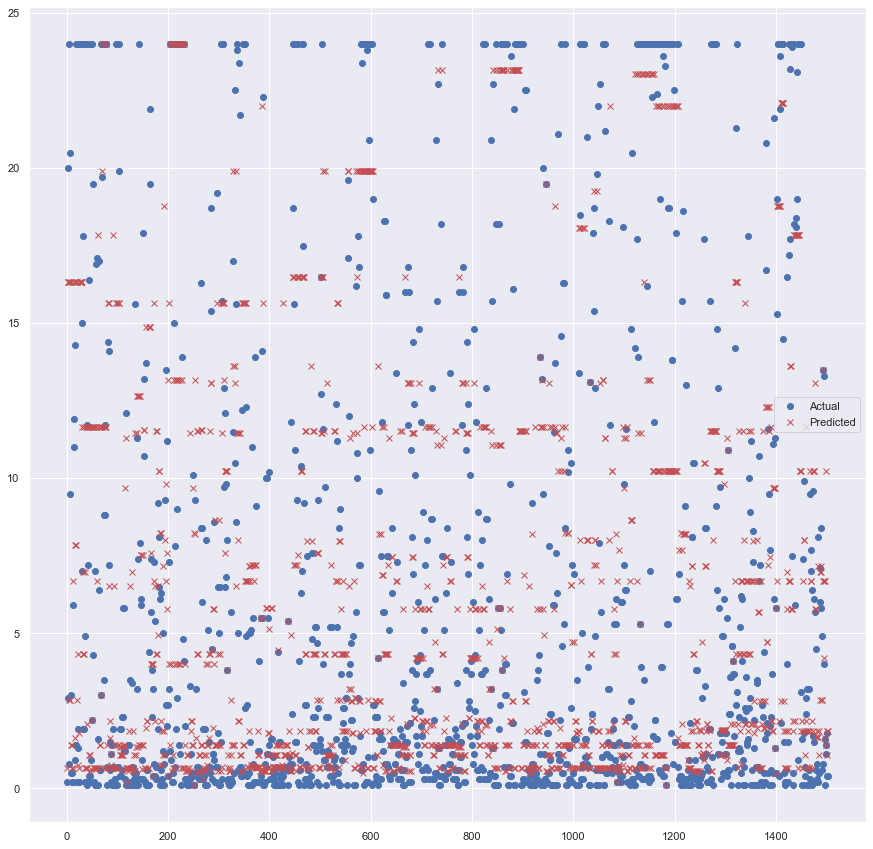

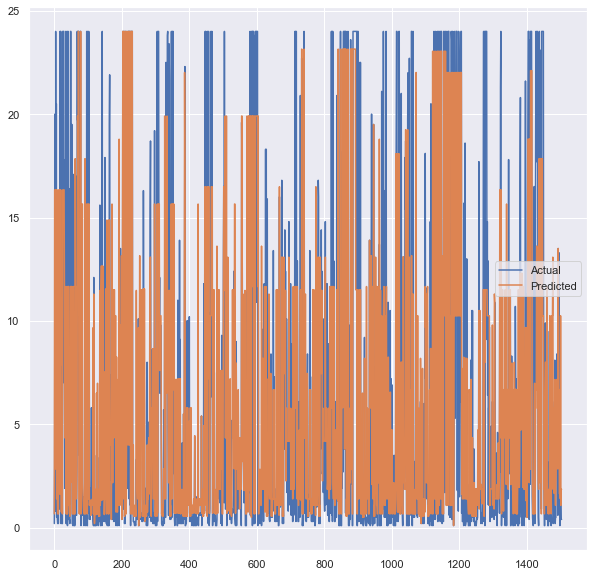

In [129]:
sdf.plot(style=['o','rx'],figsize=(15,15))
sdf.plot(figsize=(10,10));

In [130]:
sdf

,Breakdown_Remark,Actual,Predicted
0,INTL_Line Breakdown due to E/F,0.2,0.666000
1,Rep Pitch CANComFail,2.9,16.336842
2,Rep Pitch CANComFail,20.0,16.336842
3,Pitch ResolverEncoderDiff3Stop,0.8,2.846154
4,Rep Pitch CANComFail,24.0,16.336842
...,...,...,...
1499,Mech Generator PeakSpeedStop,1.4,1.400000
1500,Natural Calamities,1.1,10.247170
1501,INTL_Shut Down Taken By OMS,1.8,1.079167
1502,Elec VoltageAsymmetry,0.4,1.850769


>0.2, 0.7 = 0.217
>2.9, 16.3 = 180.549
>20.0, 16.3 = 13.419
>0.8, 2.8 = 4.187
>24.0, 16.3 = 58.724
>9.5, 2.8 = 44.274
>20.5, 16.3 = 17.332
>0.5, 1.4 = 0.800
>3.0, 16.3 = 177.871
>0.5, 1.4 = 0.800
>0.2, 0.7 = 0.217
>5.9, 6.7 = 0.604
>0.2, 0.7 = 0.217
>11.0, 16.3 = 28.482
>11.9, 16.3 = 19.686
>14.3, 7.9 = 41.602
>0.9, 1.6 = 0.526
>24.0, 16.3 = 58.724
>1.4, 7.9 = 41.603
>24.0, 16.3 = 58.724
>0.2, 2.8 = 7.002
>1.3, 0.8 = 0.299
>1.9, 4.3 = 5.968
>0.2, 1.8 = 2.560
>0.2, 0.7 = 0.217
>24.0, 16.3 = 58.724
>24.0, 16.3 = 58.724
>24.0, 16.3 = 58.724
>24.0, 16.3 = 58.724
>7.0, 16.3 = 87.177
>15.0, 11.7 = 11.144
>1.9, 4.3 = 5.968
>17.8, 7.0 = 117.000
>1.9, 4.3 = 5.968
>24.0, 11.7 = 152.234
>0.2, 0.7 = 0.217
>4.9, 7.0 = 4.340
>0.2, 0.7 = 0.217
>24.0, 11.7 = 152.234
>0.1, 0.7 = 0.320
>11.7, 2.1 = 92.373
>24.0, 11.7 = 152.234
>7.2, 11.7 = 19.907
>16.4, 11.7 = 22.451
>0.4, 1.1 = 0.461
>0.4, 1.1 = 0.461
>0.2, 0.6 = 0.123
>0.9, 0.6 = 0.071
>24.0, 11.7 = 152.234
>24.0, 11.7 = 152.234
>2.2, 2.2 = 0.000
>4.3

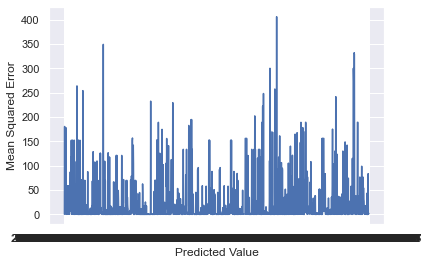

In [137]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = y_pred
# predicted value
predicted = y_true
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])**2
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))


# TENSORFLOW BASED ANN

In [87]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [88]:
bred = pd.read_csv(r'C:\Users\Shubham-pc\Downloads\Generation_data.csv')
bred.head()

,Gen_Date,MW,Loc. No.,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,MND,GF,FM,S,U,NOR,Gen_Hrs,Opr_Hrs,FY
0,01-Apr-19,1.25,K410,6884,6884,6884,22.95,0.76,0.06,100,0.0,0.0,0.0,0.0,0.0,21.1,24.0,19-20
1,02-Apr-19,1.25,K410,4781,11665,11665,15.94,1.30,0.11,100,0.0,0.0,0.0,0.0,0.0,19.4,24.0,19-20
2,03-Apr-19,1.25,K410,4714,16379,16379,15.71,1.82,0.15,100,0.0,0.0,0.0,0.0,0.0,17.3,24.0,19-20
3,04-Apr-19,1.25,K410,4136,20515,20515,13.79,2.28,0.19,100,0.0,0.0,0.0,0.0,0.0,17.2,24.0,19-20
4,05-Apr-19,1.25,K410,8783,29298,29298,29.28,3.26,0.27,100,0.0,0.0,0.0,0.0,0.0,21.2,24.0,19-20


In [89]:
bred.drop(["Gen_Date",
                     "Loc. No.",
                     "Gen_Hrs",
                     "MND",
                     "Opr_Hrs",
                     "FY "], axis=1, inplace=True)
bred.head()

,MW,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,GF,FM,S,U,NOR
0,1.25,6884,6884,6884,22.95,0.76,0.06,0.0,0.0,0.0,0.0,0.0
1,1.25,4781,11665,11665,15.94,1.30,0.11,0.0,0.0,0.0,0.0,0.0
2,1.25,4714,16379,16379,15.71,1.82,0.15,0.0,0.0,0.0,0.0,0.0
3,1.25,4136,20515,20515,13.79,2.28,0.19,0.0,0.0,0.0,0.0,0.0
4,1.25,8783,29298,29298,29.28,3.26,0.27,0.0,0.0,0.0,0.0,0.0


In [90]:
train, test = train_test_split(bred, test_size=0.3, random_state=4, shuffle=True)

print("Training Data has {} rows".format(len(train)))
print("Testing Data has {} rows".format(len(test)))

Training Data has 1841 rows
Testing Data has 789 rows


In [91]:
train_in = train.loc[:, [
                         "MW", 
                         "Gen. (kwh) DAY", 
                         "Gen. (kwh) MTD", 
                         "Gen. (kwh) YTD", 
                         "%PLF DAY", 
                         "%PLF MTD", 
                         "%PLF YTD"
                         ]
                     ].to_numpy()
                     
train_out = train.loc[:, ["GF", "FM", "S", "U", "NOR"]].to_numpy()
                      
test_in = test.loc[:, [
                        "MW", 
                        "Gen. (kwh) DAY", 
                        "Gen. (kwh) MTD", 
                        "Gen. (kwh) YTD", 
                        "%PLF DAY", 
                        "%PLF MTD", 
                        "%PLF YTD"
                        ]
                    ].to_numpy()
test_out = test.loc[:, ["GF", "FM", "S", "U", "NOR"]].to_numpy()

In [92]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.compile(optimizer="Adam",
                loss="mean_absolute_error",
                metrics=['accuracy'])
history = model.fit(train_in, train_out, epochs=100, batch_size=100)

Epoch 1/100
1841/1841 [==============================] - 0s 113us/sample - loss: 63783.0282 - acc: 0.0837
Epoch 2/100
1841/1841 [==============================] - 0s 11us/sample - loss: 39840.9145 - acc: 0.0820
Epoch 3/100
1841/1841 [==============================] - 0s 14us/sample - loss: 20408.4696 - acc: 0.0826
Epoch 4/100
1841/1841 [==============================] - 0s 18us/sample - loss: 8666.7469 - acc: 0.0831
Epoch 5/100
1841/1841 [==============================] - 0s 19us/sample - loss: 2324.2759 - acc: 0.1972
Epoch 6/100
1841/1841 [==============================] - 0s 17us/sample - loss: 291.7713 - acc: 0.5986
Epoch 7/100
1841/1841 [==============================] - 0s 17us/sample - loss: 110.8767 - acc: 0.6540
Epoch 8/100
1841/1841 [==============================] - 0s 17us/sample - loss: 52.9156 - acc: 0.6697
Epoch 9/100
1841/1841 [==============================] - 0s 15us/sample - loss: 23.7108 - acc: 0.6936
Epoch 10/100
1841/1841 [==============================] - 0s 16us/

In [93]:
model.evaluate(test_in, test_out)[1]

789/789 [==============================] - 0s 132us/sample - loss: 0.6584 - acc: 0.7313


0.7313054

dict_keys(['loss', 'acc'])


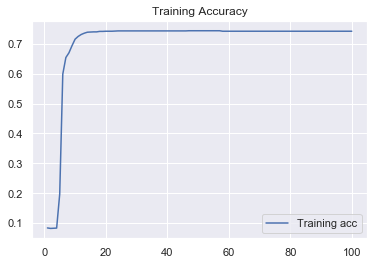

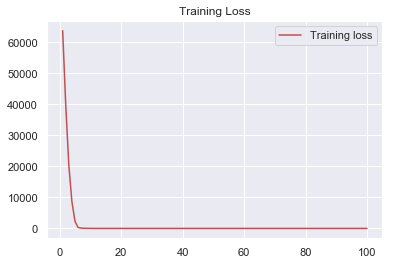

In [94]:
print(history.history.keys())
acc = history.history['acc']
loss = history.history['loss']


epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss')
plt.legend()

plt.show()